# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [70]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color 
from PIL import Image

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

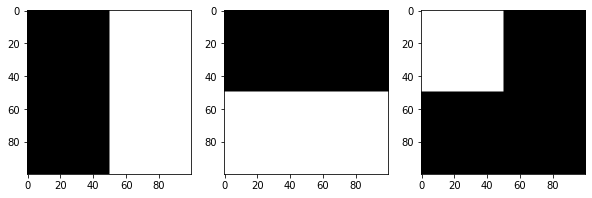

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


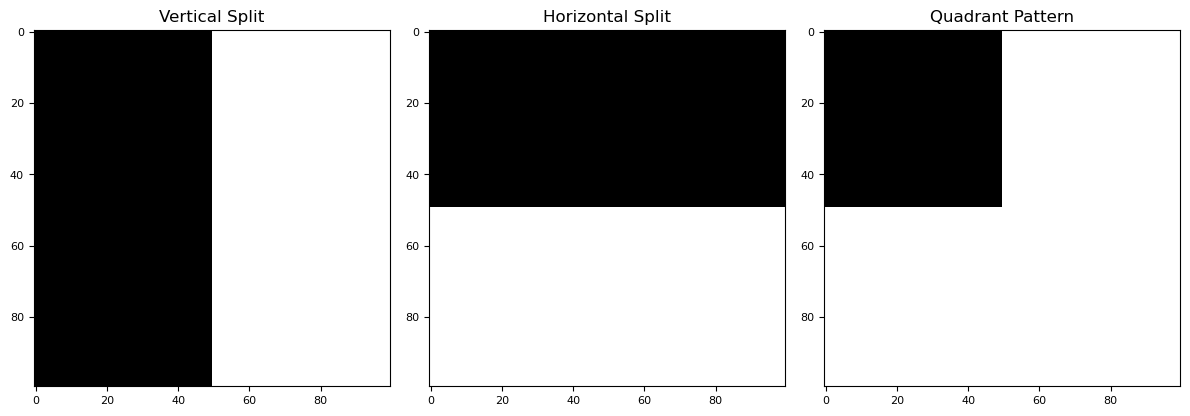

In [15]:
# solution
# Create a vertical split (left black, right white)
vertical_split = np.zeros((100, 100), dtype=np.uint8)
vertical_split[:, 50:] = 255  # Right half white

# Create a horizontal split (top black, bottom white)
horizontal_split = np.zeros((100, 100), dtype=np.uint8)
horizontal_split[50:, :] = 255  # Bottom half white

# Create a quadrant pattern
quadrant_pattern = np.ones((100, 100), dtype=np.uint8) * 255  # Start with all white
quadrant_pattern[:50, :50] = 0  # Set the top-left quadrant to black

# Plot the images in a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(vertical_split, cmap='gray')
axes[0].set_title("Vertical Split")
axes[0].tick_params(axis='both', which='both', labelsize=8) 

axes[1].imshow(horizontal_split, cmap='gray')
axes[1].set_title("Horizontal Split")
axes[1].tick_params(axis='both', which='both', labelsize=8)  

axes[2].imshow(quadrant_pattern, cmap='gray')
axes[2].set_title("Quadrant Pattern")
axes[2].tick_params(axis='both', which='both', labelsize=8)  

plt.tight_layout()
plt.show()

*   Use the above three images to create the following image

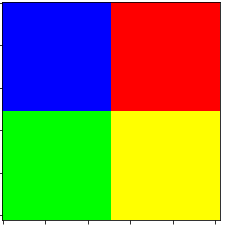
*Hint: Remember channels and color spaces*

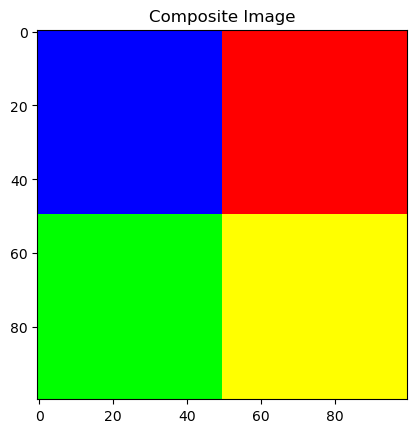

In [18]:
# solution
# Create an empty 100x100x3 RGB image
composite_image = np.zeros((100, 100, 3), dtype=np.uint8)

# Top-left (Blue)
composite_image[:50, :50, 2] = 255  # Set Blue channel to max

# Top-right (Red)
composite_image[:50, 50:, 0] = 255  # Set Red channel to max

# Bottom-left (Green)
composite_image[50:, :50, 1] = 255  # Set Green channel to max

# Bottom-right (Yellow)
composite_image[50:, 50:, 0] = 255  # Set Red channel to max
composite_image[50:, 50:, 1] = 255  # Set Green channel to max

# Display the composite image
plt.imshow(composite_image)
plt.title("Composite Image")
plt.axis("on")
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

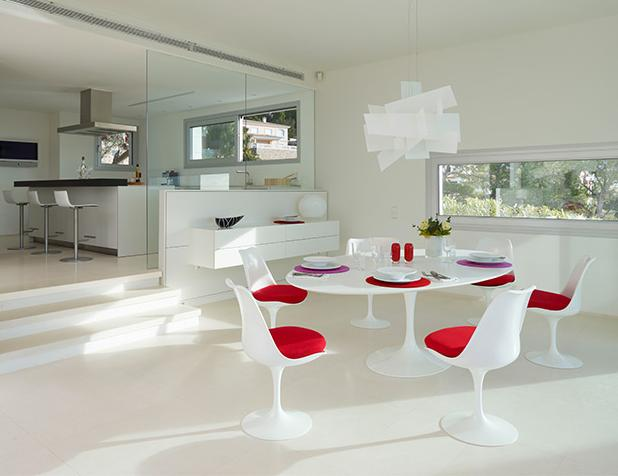

*   Extract individual channels and plot them using matplotlib subplot.



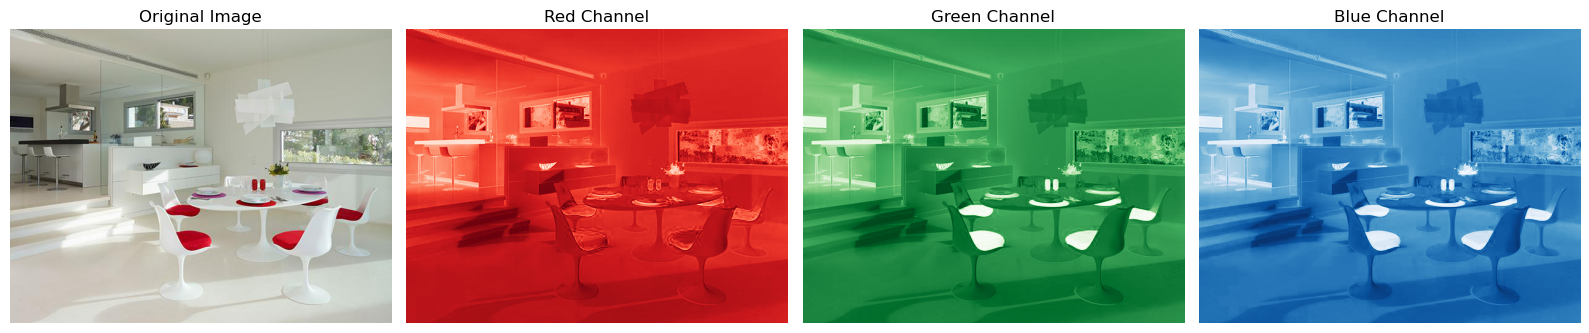

In [36]:
# solution
# Open the image using Pillow
image = Image.open('images/sillas.jpg')  

# Convert the image to a NumPy array
image_array = np.array(image)

# Extract individual channels
red_channel = image_array[:, :, 0]  # Red channel
green_channel = image_array[:, :, 1]  # Green channel
blue_channel = image_array[:, :, 2]  # Blue channel

# Plot the original image and individual channels
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Original image
axes[0].imshow(image_array)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Red channel
axes[1].imshow(red_channel, cmap='Reds')
axes[1].set_title("Red Channel")
axes[1].axis("off")

# Green channel
axes[2].imshow(green_channel, cmap='Greens')
axes[2].set_title("Green Channel")
axes[2].axis("off")

# Blue channel
axes[3].imshow(blue_channel, cmap='Blues')
axes[3].set_title("Blue Channel")
axes[3].axis("off")

plt.tight_layout()
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

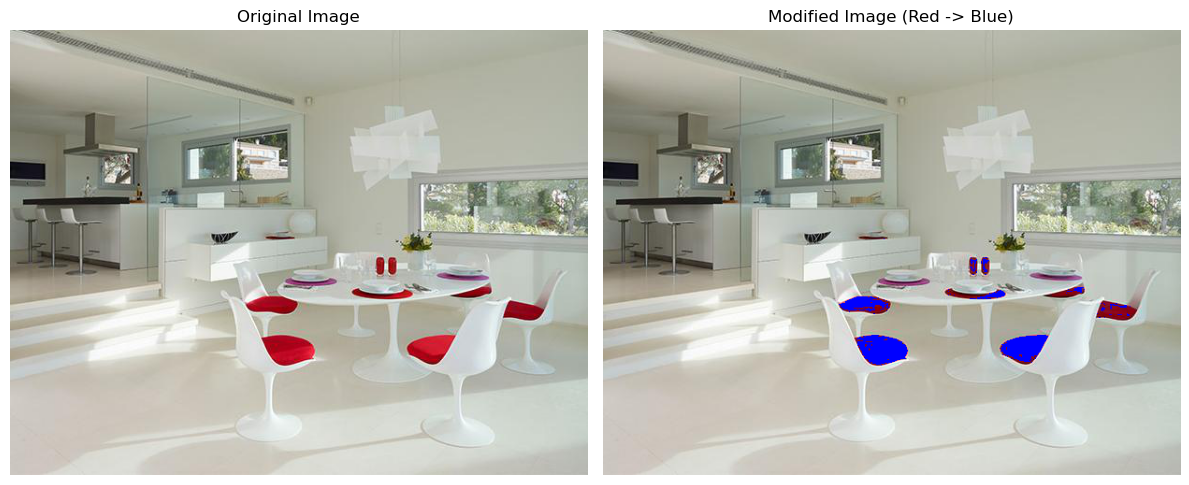

In [46]:
# solution
# Open the image using Pillow
image = Image.open('images/sillas.jpg')  

# Convert the image to a NumPy array
image_array = np.array(image)

# Create a copy of the image array to modify
modified_image_array = image_array.copy()

# Identify "red" pixels and replace them with "blue"
# Red is identified as having a high red channel value compared to green and blue
red_mask = (image_array[:, :, 0] > 150) & (image_array[:, :, 1] < 100) & (image_array[:, :, 2] < 100)

# Replace red pixels with blue [R, G, B] = [0, 0, 255]
modified_image_array[red_mask] = [0, 0, 255]

# Convert the modified NumPy array back to an image
modified_image = Image.fromarray(modified_image_array)

# Plot the original and modified images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(image_array)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Modified image
axes[1].imshow(modified_image_array)
axes[1].set_title("Modified Image (Red -> Blue)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

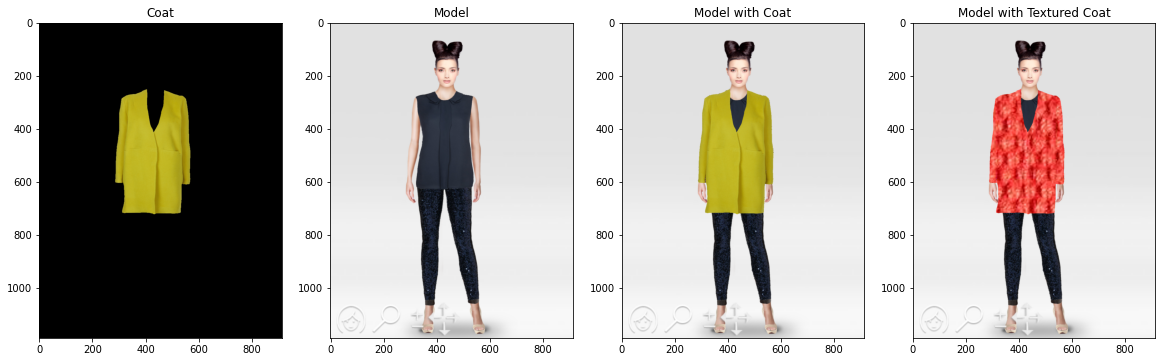

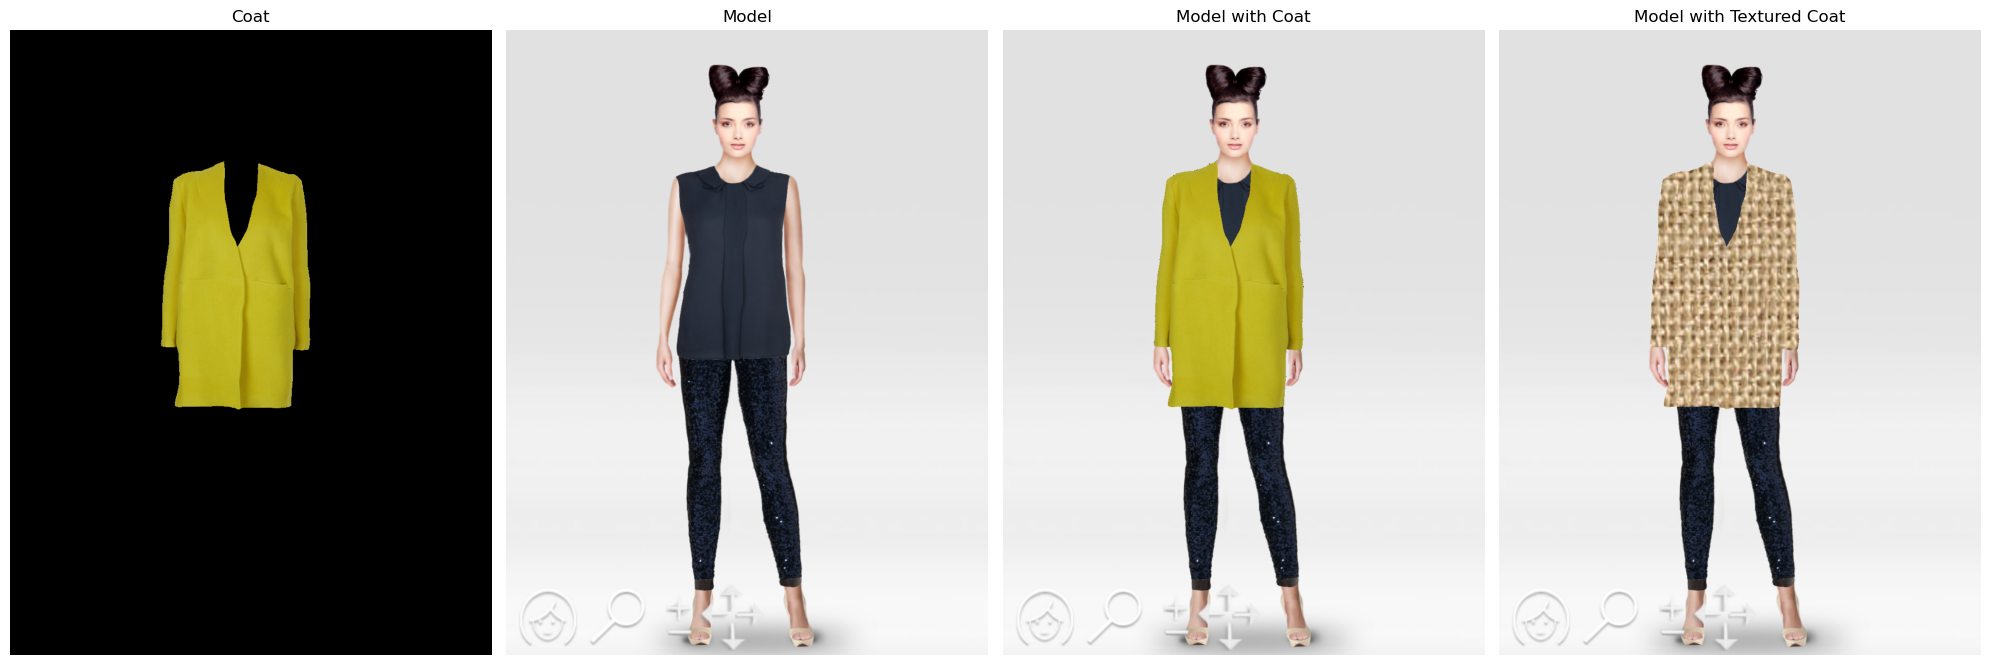

In [66]:
# solution
# Load images
coat_image = Image.open('images/coat.png').convert('RGBA')  
model_image = Image.open('images/model.png').convert('RGBA')  
texture_image = Image.open('images/texture3.jpg').convert('RGBA')  

# Convert images to NumPy arrays
coat_array = np.array(coat_image)
model_array = np.array(model_image)
texture_array = np.array(texture_image.resize(coat_array.shape[:2][::-1]))

# Create a binary mask for the coat
coat_mask = (coat_array[:, :, 0:3] != [0, 0, 0]).any(axis=2)  # True for non-black pixels

# Add the coat to the model
model_with_coat = model_array.copy()
model_with_coat[coat_mask] = coat_array[coat_mask]

# Apply texture to the coat
model_with_texture = model_array.copy()
model_with_texture[coat_mask] = texture_array[coat_mask]

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

# Original coat
axes[0].imshow(coat_image)
axes[0].set_title("Coat")
axes[0].axis("off")

# Original model
axes[1].imshow(model_image)
axes[1].set_title("Model")
axes[1].axis("off")

# Model with coat
axes[2].imshow(model_with_coat)
axes[2].set_title("Model with Coat")
axes[2].axis("off")

# Model with textured coat
axes[3].imshow(model_with_texture)
axes[3].set_title("Model with Textured Coat")
axes[3].axis("off")

plt.tight_layout()
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




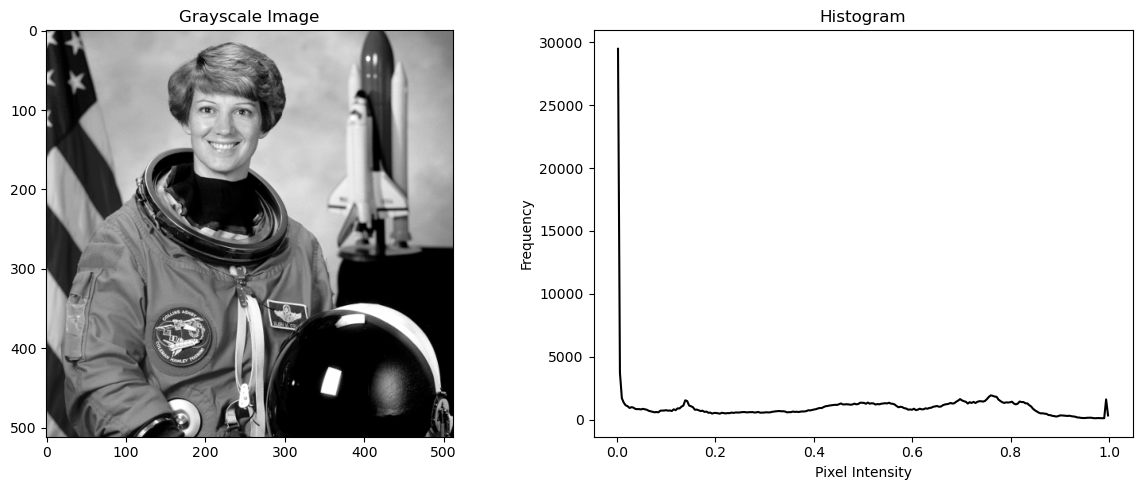

In [74]:
# solution
# Load the astronaut image
astronaut_image = data.astronaut()

# Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut_image)

# Compute the histogram
hist, bin_centers = exposure.histogram(astronaut_gray)

# Plot the grayscale image and its histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grayscale image
axes[0].imshow(astronaut_gray, cmap='gray')
axes[0].set_title("Grayscale Image")

# Histogram
axes[1].plot(bin_centers, hist, color='black')
axes[1].set_title("Histogram")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

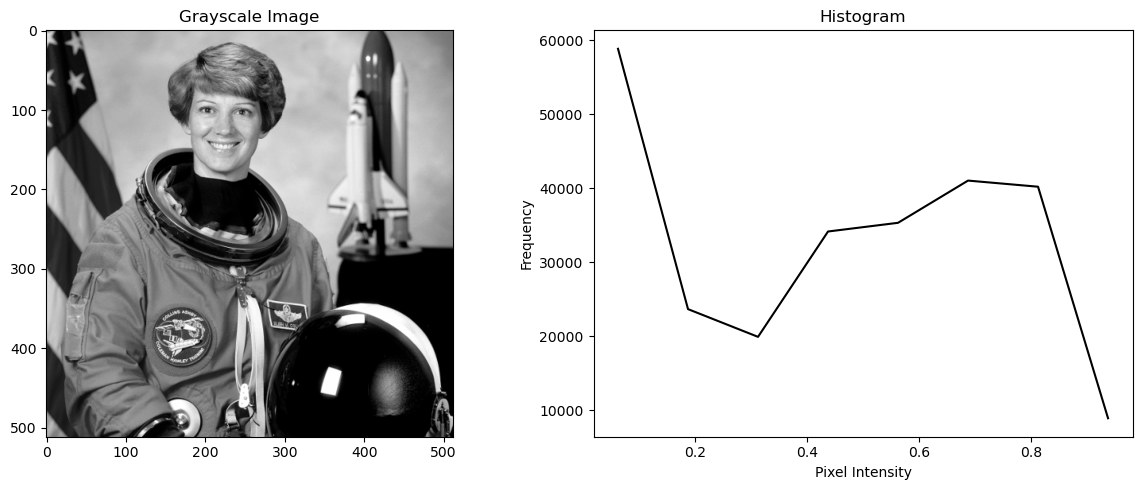

In [76]:
# solution
# Compute the histogram
hist, bin_centers = exposure.histogram(astronaut_gray, nbins=8)

# Plot the grayscale image and its histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grayscale image
axes[0].imshow(astronaut_gray, cmap='gray')
axes[0].set_title("Grayscale Image")

# Histogram
axes[1].plot(bin_centers, hist, color='black')
axes[1].set_title("Histogram")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


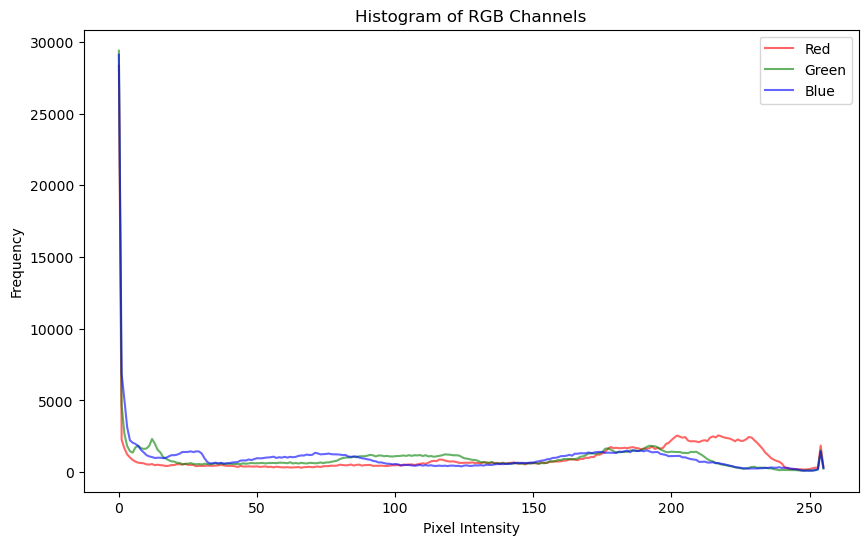

In [82]:
#solution
# Compute the histogram for each channel (RGB)
hist_r, bins_r = np.histogram(astronaut_image[:, :, 0], bins=256, range=(0, 256))
hist_g, bins_g = np.histogram(astronaut_image[:, :, 1], bins=256, range=(0, 256))
hist_b, bins_b = np.histogram(astronaut_image[:, :, 2], bins=256, range=(0, 256))

# Plot the histograms
plt.figure(figsize=(10, 6))

# Plot histogram for each channel
plt.plot(bins_r[:-1], hist_r, color='r', alpha=0.6, label='Red')
plt.plot(bins_g[:-1], hist_g, color='g', alpha=0.6, label='Green')
plt.plot(bins_b[:-1], hist_b, color='b', alpha=0.6, label='Blue')

# Set plot labels and title
plt.title("Histogram of RGB Channels")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



C:\Users\dylan\anaconda3\Lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


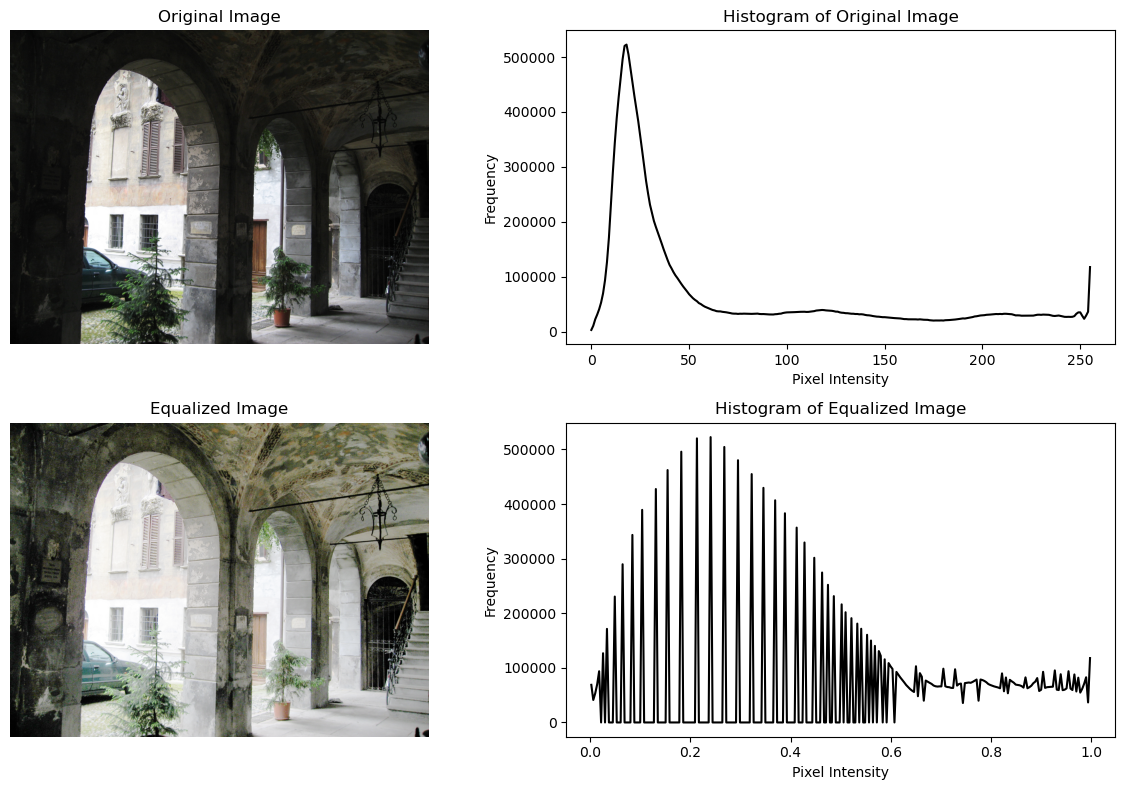

In [84]:
# solution
# Read the image
image = io.imread('images/aquatermi_lowcontrast.jpg')

# Compute the histogram of the original image
hist_original, bins_original = exposure.histogram(image)

# Perform histogram equalization
image_equalized = exposure.equalize_hist(image)

# Compute the histogram of the equalized image
hist_equalized, bins_equalized = exposure.histogram(image_equalized)

# Plot the results in a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Histogram of the original image
axes[0, 1].plot(bins_original, hist_original, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

# Equalized image
axes[1, 0].imshow(image_equalized, cmap='gray')
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis("off")

# Histogram of the equalized image
axes[1, 1].plot(bins_equalized, hist_equalized, color='black')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



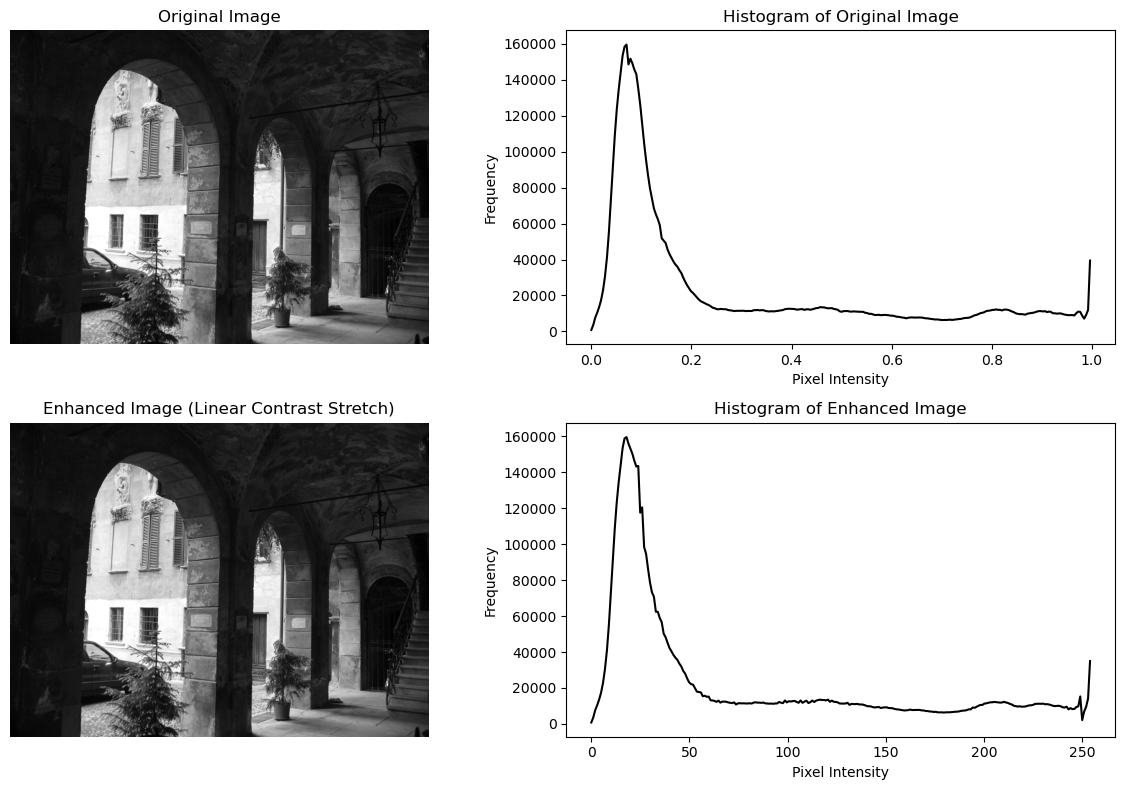

In [91]:
# solution
# Function to perform linear contrast stretching
def linear_contrast_stretch(image, bins=256):
    """
    Perform linear contrast stretching on a grayscale image.
    
    Parameters:
    - image: Grayscale image array (2D).
    - bins: Number of bins for the histogram (default 256).
    
    Returns:
    - enhanced_image: The contrast-enhanced image array.
    """
    # Compute min and max pixel values of the original image
    min_input = np.min(image)
    max_input = np.max(image)
    
    # Perform linear contrast stretching
    enhanced_image = ((image - min_input) / (max_input - min_input)) * 255
    
    # Ensure the values are within the 0-255 range
    enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)
    
    return enhanced_image

# Read the image (replace with your actual image path)
image_read = 'images/aquatermi_lowcontrast.jpg'
image = io.imread(image_read)

# Convert the image to grayscale (if the image is RGB)
if len(image.shape) == 3:  # If the image has 3 channels (RGB)
    image_gray = color.rgb2gray(image)
else:
    image_gray = image  # If already grayscale

# Perform linear contrast stretch
enhanced_image = linear_contrast_stretch(image_gray)

# Compute histograms for the original and enhanced images
hist_original, bins_original = np.histogram(image_gray, bins=256, range=(0, 1))  # Grayscale range [0, 1]
hist_enhanced, bins_enhanced = np.histogram(enhanced_image, bins=256, range=(0, 255))  # Enhanced image range [0, 255]

# Plot the original and enhanced images along with their histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot original image
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Plot histogram of the original image
axes[0, 1].plot(bins_original[:-1], hist_original, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

# Plot enhanced image
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title("Enhanced Image (Linear Contrast Stretch)")
axes[1, 0].axis("off")

# Plot histogram of the enhanced image
axes[1, 1].plot(bins_enhanced[:-1], hist_enhanced, color='black')
axes[1, 1].set_title("Histogram of Enhanced Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()




# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




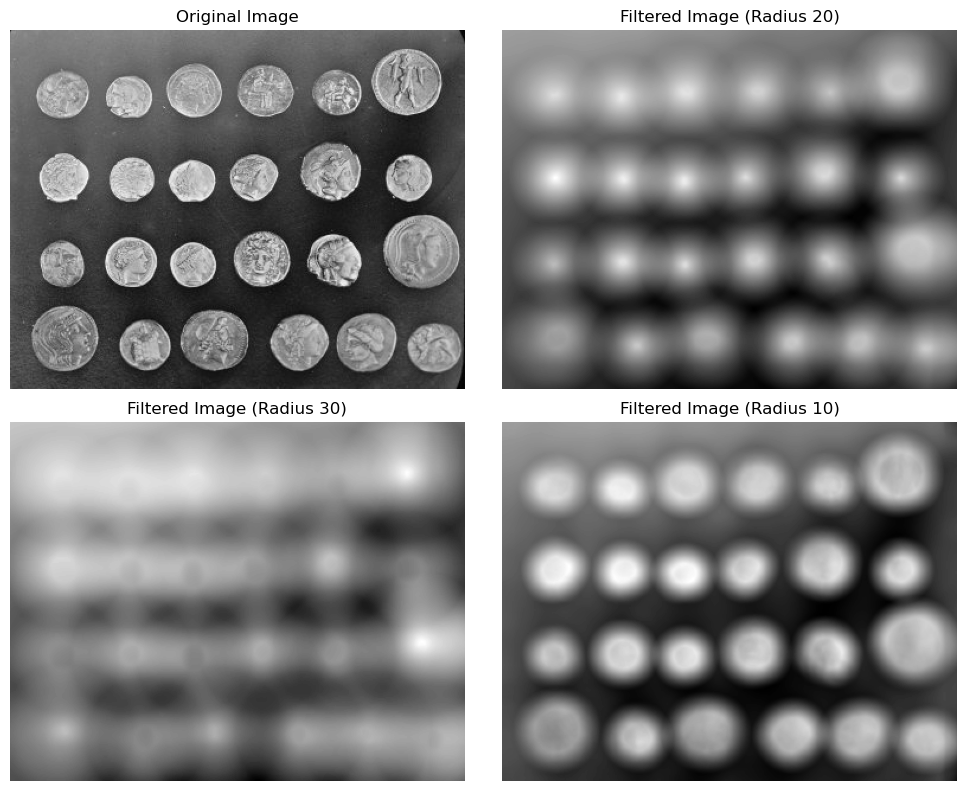

In [99]:
# solution
# Load the coins image from the skimage.data module
coins_image = data.coins()

# Convert the image to uint8 type
coins_image = coins_image.astype(np.uint8)

# Define the disk structuring elements with different radii
radius_20 = morphology.disk(20)
radius_30 = morphology.disk(30)
radius_10 = morphology.disk(10)

# Apply the mean filter with different radii
filtered_20 = filters.rank.mean(coins_image, radius_20)
filtered_30 = filters.rank.mean(coins_image, radius_30)
filtered_10 = filters.rank.mean(coins_image, radius_10)

# Create a 2x2 subplot to visualize the original and filtered images
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the original image
axes[0, 0].imshow(coins_image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Plot the filtered image with radius 20
axes[0, 1].imshow(filtered_20, cmap='gray')
axes[0, 1].set_title("Filtered Image (Radius 20)")
axes[0, 1].axis("off")

# Plot the filtered image with radius 30
axes[1, 0].imshow(filtered_30, cmap='gray')
axes[1, 0].set_title("Filtered Image (Radius 30)")
axes[1, 0].axis("off")

# Plot the filtered image with radius 10
axes[1, 1].imshow(filtered_10, cmap='gray')
axes[1, 1].set_title("Filtered Image (Radius 10)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

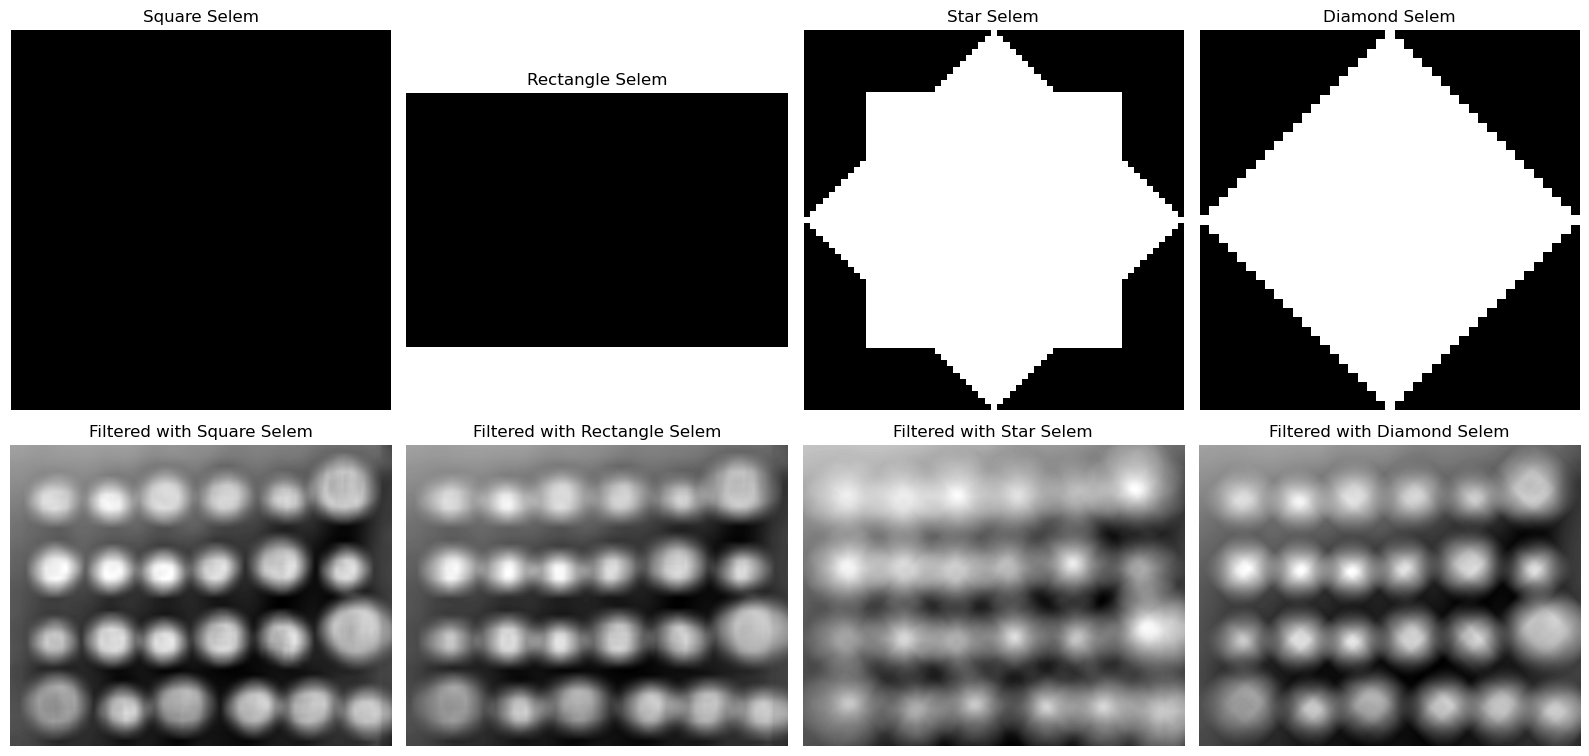

In [107]:
# solution
# Load the coins image 
coins_image = data.coins()

# Define the structuring elements with different shapes
square_selem = morphology.square(20)
rectangle_selem = morphology.rectangle(20, 30)
star_selem = morphology.star(20)
diamond_selem = morphology.diamond(20)

# Apply the mean filter with different structuring elements
filtered_square = filters.rank.mean(coins_image, square_selem)
filtered_rectangle = filters.rank.mean(coins_image, rectangle_selem)
filtered_star = filters.rank.mean(coins_image, star_selem)
filtered_diamond = filters.rank.mean(coins_image, diamond_selem)

# Create a 2 x n subplot (n=4 for 4 different selem)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Plot each structuring element and the corresponding filtered image
selems = [square_selem, rectangle_selem, star_selem, diamond_selem]
filtered_images = [filtered_square, filtered_rectangle, filtered_star, filtered_diamond]
titles = ['Square', 'Rectangle', 'Star', 'Diamond']

for i in range(4):
    # Plot the structuring element in the first row
    axes[0, i].imshow(selems[i], cmap='gray')
    axes[0, i].set_title(f"{titles[i]} Selem")
    axes[0, i].axis("off")
    
    # Plot the corresponding filtered image in the second row
    axes[1, i].imshow(filtered_images[i], cmap='gray')
    axes[1, i].set_title(f"Filtered with {titles[i]} Selem")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

As the radius increases, the disk-shaped structuring element becomes larger, which means the mean filter now averages over a larger neighborhood of pixels. This leads to stronger smoothing or blurring.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

The disk is good at preserving the shape of the objects in the image but may reduce the sharpness of edges, especially with larger radii.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

The Gaussian filter is a type of linear filter that smooths an image using a Gaussian function. It applies more weight to pixels closer to the center of the filter window and less weight to pixels farther from the center, meanwhile, the mean filter is a simple linear filter that replaces each pixel in an image with the average (mean) of the pixel values in its neighborhood.

## Use Cases:
### Mean Filter:
- Simple noise reduction in images where edge preservation is not crucial.
- In situations with high-frequency noise that needs to be removed without concern for blurring edges significantly.
### Gaussian Filter:
- In image blurring when you need to maintain smooth transitions, especially in medical imaging, satellite image processing, or facial recognition.
- In edge detection tasks, where Gaussian filtering is often used as a preprocessing step to suppress noise before applying edge detection algorithms.
- Gaussian smoothing is often preferred for Gaussian noise reduction or when a more natural blur is desired.